<a href="https://colab.research.google.com/github/ArcTrinity9/Datasets-ReaChOcc-and-SynChOcc/blob/main/perceptual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                    <h1 align="center">**Perceptual Error<h1>**
 ## **<p align="center">An Evaluation Code for ReaChOcc and SynChOcc Datasets**<p>

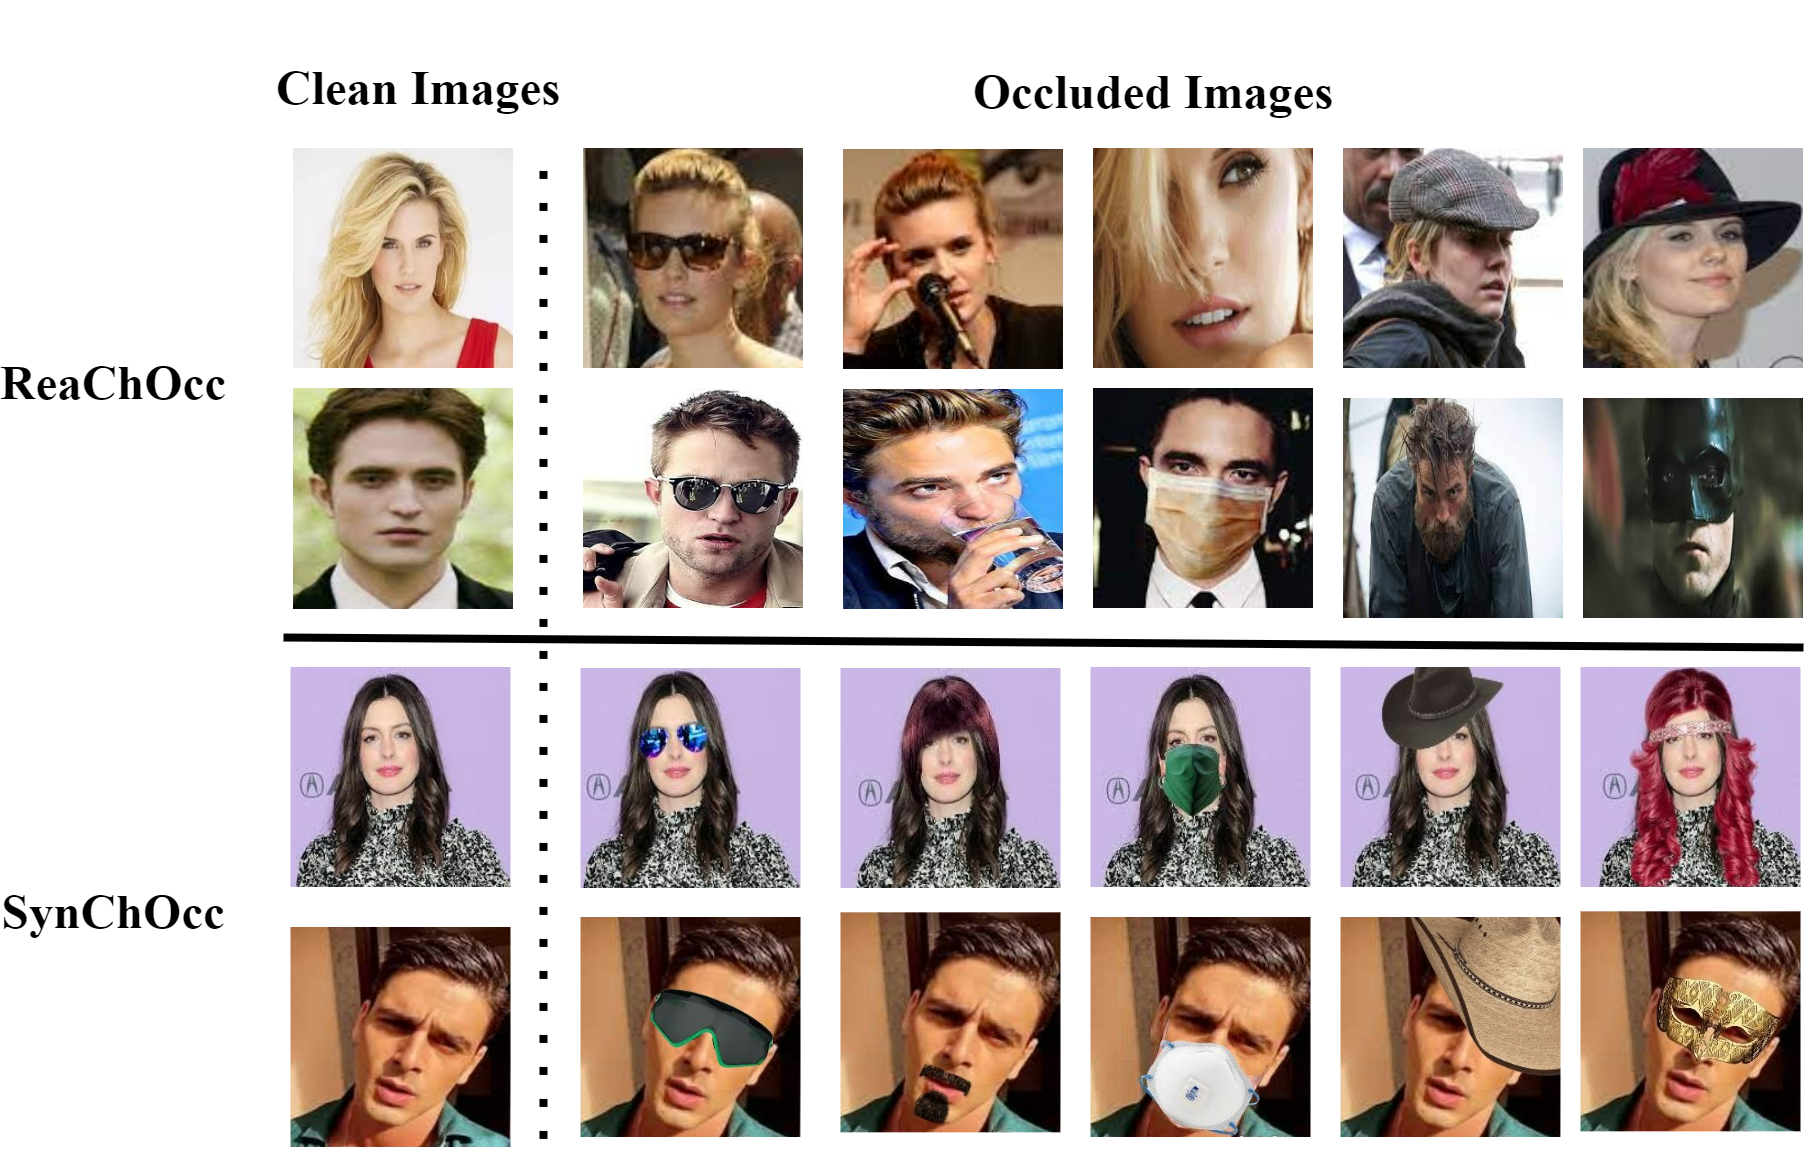

In [ ]:
#@title Setup dependencies

!pip install deepface
%cd /content/
!git clone https://github.com/ArcTrinity9/Datasets-ReaChOcc-and-SynChOcc


In [ ]:
#@title Run evaluation on demo images
from deepface import DeepFace
import os,glob
import numpy as np
from PIL import Image
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", 'DeepFace', "ArcFace", "SFace"]
raw=glob.glob('raw_demo/*.jpg')
raw+=glob.glob('proj_demo/*.png')
bucket=np.zeros((len(models),len(raw)))
for j, img in enumerate(raw):
  for k in range(len(models)):
    raw_image=np.asarray(Image.open(img).resize((224,224)))[:,:,:3]
    image_reproj= np.asarray(Image.open(os.path.join('/content',os.path.split(img)[-1])).resize((224,224)))[:,:,:3]
    result = DeepFace.verify(img1_path = raw_image, img2_path = image_reproj, enforce_detection=False, distance_metric = 'euclidean_l2',model_name = models[k])
    bucket[k, j] = result['distance']
mean_, std_=np.mean(bucket,axis=-1), np.std(bucket,axis=-1)
for i in range(len(mean_)):
  print('With model:%s --> Mean: %f, Standard Deviation: %f' % (models[i], mean_[i], std_[i]))

In [ ]:
#@title Use your own image
#@markdown Upload your clean images to `raw` folder\
#@markdown Upload your re-projected 3D faces to `proj` folder
from deepface import DeepFace
import os,glob
import numpy as np
from PIL import Image
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", 'DeepFace', "ArcFace", "SFace"]
raw=glob.glob('/content/raw/*.jpg')
raw+=glob.glob('/content/raw/*.png')
bucket=np.zeros((len(models),len(raw)))
for j, img in enumerate(raw):
  for k in range(len(models)):
    raw_image=np.asarray(Image.open(img).resize((224,224)))[:,:,:3]
    image_reproj= np.asarray(Image.open(os.path.join('/content/proj',os.path.split(img)[-1])).resize((224,224)))[:,:,:3]
    result = DeepFace.verify(img1_path = raw_image, img2_path = image_reproj, enforce_detection=False, distance_metric = 'euclidean_l2',model_name = models[k])
    bucket[k, j] = result['distance']
mean_, std_=np.mean(bucket,axis=-1), np.std(bucket,axis=-1)
for i in range(len(mean_)):
  print('With model:%s --> Mean: %f, Standard Deviation: %f' % (models[i], mean_[i], std_[i]))